# NUMPY

* Numpy is one of the core packages for numerical computing in python.
    * Efficient numeric computation with C primitives
    * Efficient collection with vectorized operations
    * An integrated and natural linear algebra API
    * A C API for connecting Numpy with libraries written in C,C++ or FORTRAN

## Space and Time efficiency of numpy array

In [ ]:
import numpy as np
import sys
import time
b=range(1000)
b=list(b)
c=np.arange(1000)

In [ ]:
space_b=sys.getsizeof(5)*len(b)
space_c=c.size*c.itemsize

In [ ]:
print(f"size of 1000 value list -->{space_b}<--\nsize of 1000 value np array -->{space_c}<--")

In [ ]:
s_time_b=time.time()
dummy=[(x+y) for x,y in zip(b,b)]
e_time_b=time.time()
time_b=(e_time_b-s_time_b)*1000

In [ ]:
s_time_c=time.time()
dummy=[(x+y) for x,y in zip(c,c)]
e_time_c=time.time()
time_c=(e_time_c-s_time_c)*1000

In [ ]:
print(f"time taken by list -->{time_b}s<--\ntime taken by np array -->{time_c}s<--")

## ndarray basic Attributes

In [ ]:
import numpy as np
np_a=np.array([1,2,3,4,5,6,7,'an',8])

In [ ]:
np_a.ndim #return no.of dimention

In [ ]:
np_a.shape #returns shape in tuple

In [ ]:
np_a.size #total no.of elements

In [ ]:
np_a.dtype #type of each element

In [ ]:
np_a.itemsize #size of each element in bytes

In [ ]:
np_a.nbytes #total bytes consumed by all elements

### Bit more on `.shape`

In [ ]:
np_b=np.array([[1,2],[3,4],[5,6]])
print(f"dimention:{np_b.ndim}\nshape:{np_b.shape}\nsize:{np_b.size}\nelement type:{np_b.dtype}")

In [ ]:
np_c=np.array([[[1]],[[4]],[[7]]],dtype=np.float64) #we can also explicitely mention the data type
print(f"dimention:{np_c.ndim}\nshape:{np_c.shape}\nsize:{np_c.size}\nelement type:{np_c.dtype}")

## Numpy array creation

* np_var=np.zeros(shape=(,))
* np_var=np.full(shape=(2,3),fill_value=10.5)
* By Numeric sequence generator
    * `np.arange([start, ]stop, [step, ]dtype=None, *, like=None)`
        * Numbers based on step value
        * [start,stop)
        * when using non integer step results may not br consistent  
    * `np.linspace(Start=0,Stop=15,num=5,endpoint=True,retstep=False,dtype="int64",axis=0)`
        * Numbers created based on size value
    * `np.geomspace(start, stop, num=50, endpoint=True, dtype=None, axis=0)`
        * Return numbers spaced evenly on a log scale
        * Number of sample to generate (num) Default is 50
        * Circle  `np.geomspace(-1+0j, 1+0j, num=5)`
        * Straight line `np.geomspace(1j, 1000j, num=4)`
    * `np.logspace(start, stop, num=50, endpoint=True, base=10.0, dtype=None, axis=0)`
        * Number of sample to generate (num) Default is 50
        * By default base value is 10
* By Random numbers generator

### Basic ndarray generation

In [ ]:
import numpy as np
np_d=np.zeros(shape=(3,3))
np_e=np.full(shape=(3,3),fill_value="R")

In [ ]:
print(f"zeros: {np_d}\nfull: {np_e}")

### Numeric sequence generator

In [ ]:
import numpy as np
# both are correct
# np_e=np.arange(0,15,1,dtype=None)
np_f=np.arange(start=0,stop=15,step=1,dtype=None)
np_g=np.linspace(start=[0,1],stop=[15,16],num=5,endpoint=True,retstep=True,dtype="int64",axis=0)
np_h=np.geomspace(1, 1000, num=3, endpoint=False)
np_i=np.logspace(2.0, 3.0, num=4, base=2.0)

In [ ]:
print(f"arange:  {np_f}\nlinspace:  {np_g}\ngeomspace:  {np_h}\nlogspace:  {np_i}")

### Random numbers generators (numpy.random)

#### Basic

* Numpy’s random number routines produce pseudo random numbers using combinations of a BitGenerator  and a Generator 
* BitGenerators used to create sequences
* Generator useed to those sequences to sample from different statistical distributions
* __BitGenerators__
    * Objects that generate random numbers.
    * These are typically unsigned integer words filled with sequences of either 32 or 64 random bits.
* __Generators__
    * Objects that transform sequences of random bits from a BitGenerator into sequences of numbers that follow a specific probability distribution (such as uniform, Normal or Binomial) within a specified interval.
    * the Generator can be initialized with a number of different BitGenerators. It exposes many different probability distributions.
    * The `legacy RandomState random number` routines are still available, but limited to a single BitGenerator.
* __Generator__ can be used as a replacement for __RandomState__. Both class instances hold a internal BitGenerator instance to provide the bit stream
* `np.random.Generator.bit_generator` Gets the bit generator instance used by the generator
| __RandomState__ | __Generators__ |
| --- | --- |
| MT19937 | PCG64 |
| `random_sample` | `random` |
| `rand` |  |
| `randint` | `integers` |
| `random_integers` |  |
| `tomaxint` |  |
| `seed` | `SeedSequence.spawn` |

* One can instantiate Generator directly with a BitGenerator instance.

In [ ]:
from numpy.random import Generator, PCG64
seed_value =12345
rng = Generator(PCG64(seed_value))
np_j=rng.standard_normal(8)

* We can also use `default_rng` to create a instance of Generator to create a random number

In [ ]:
from numpy.random import default_rng
seed_value=12345
rng=default_rng(seed_value)
np_k=rng.standard_normal(8)

#### Seeding and Entropy

* https://machinelearningmastery.com/what-is-information-entropy/
* https://numpy.org/doc/stable/reference/random/bit_generators/generated/numpy.random.SeedSequence.html

#### Random Generator
* https://numpy.org/doc/stable/reference/random/generator.html

* `np.random.Generator.integers(low, high=None, size=None, dtype=np.int64, endpoint=False)`
    * size: int or tuple of ints, optional
        * Output shape. If the given shape is, e.g., (m, n, k), then m * n * k samples are drawn. Default is None, in which case a single value is returned.

In [ ]:
from numpy.random import default_rng
seed_value=12345
rng=default_rng(seed_value)
np_l=rng.integers(5, size=(2, 4))
#1 by 3 array using 3 upperbound
np_m=rng.integers(1, [3, 5, 10])
#1 by 3 array using 3 lowerbound
np_n=rng.integers([1, 5, 7], 10)
#2 by 4 array using broadcasting 
np_o=rng.integers([1, 3, 5, 7], [[10], [20]], dtype=np.uint8)
np_p=rng.integers([1, 3, 5, 7], [[10], [20]])

In [ ]:
np_l
np_m
np_n
np_o
np_p

* `np.random.Generator.random(size=None, dtype=np.float64, out=None)`
    * Results are from the “continuous uniform” distribution over the stated interval.
    * only __float64__ and __float32__ are supported
    * fot Unif[a,b),b>a  `(b - a) * random() + a`

In [ ]:
from numpy.random import default_rng
seed_value=12345
rng=default_rng(seed_value)
np_q=rng.random((3,5))
np_r=2*rng.random((3,5))+3

In [ ]:
np_q
np_r

* `np.random.Generator.choice(a, size=None, replace=True, p=None, axis=0, shuffle=True)`
    * p: 1-D array_like, optional
        *The probabilities associated with each entry in a. If not given, the sample assumes a uniform distribution over all entries in a
    * axis: axis along which selection is performed, Default is 0

In [ ]:
from numpy.random import default_rng
seed_value=12345
rng=default_rng(seed_value)
#Generate a uniform random sample from np.arange(5) of size 3
np_s=rng.choice(5, 3)
#Generate a non-uniform random sample from np.arange(5) of size 3
np_t=rng.choice(5, 3, p=[0.1, 0, 0.3, 0.6, 0])
#Generate a uniform random sample from a 2-D array along the first axis (the default), without replacement
np_u=rng.choice([[0, 1, 2], [3, 4, 5], [6, 7, 8]], 2, replace=False)
#Generate a uniform random sample from np.arange(5) of size 3 without replacement
np_v=rng.choice(5, 3, replace=False)

In [ ]:
np_s
np_t
np_u
np_v

* `np.random.Generator.bytes(length)`
    * Return no.of random bytes
    * length: Number of random bytes

In [ ]:
from numpy.random import default_rng
seed_value=12345
rng=default_rng(seed_value)
np_w=rng.bytes(10)

In [ ]:
np_w

#### Legacy Random Generation
* This generator is frozen and will not have further improvement as of v1.16
* https://numpy.org/doc/stable/reference/random/legacy.html?highlight=randomstate#numpy.random.RandomState

* `class numpy.random.RandomState(seed=None)`
* It depends on Box-Muller normals or inverse CDF exponentials or gammas.
* This class should only be used if it is essential to have randoms that are identical to what would have been produced by previous versions of NumPy
* RandomState adds additional information to the state which is required when using Box-Muller normals since these are produced in pairs.
* It is important to use RandomState.get_state, and not the underlying bit generators state

In [ ]:
from numpy.random import MT19937
from numpy.random import RandomState

np_x = RandomState(12345)
mt19937 = MT19937()
mt19937.state = np_x.get_state()
np_y = RandomState(mt19937)

# Same output
np_x.standard_normal()
np_y.standard_normal()

np_x.random()
np_y.random()

np_x.standard_exponential()
np_y.standard_exponential()


* `random.RandomState.rand(d0, d1, ..., dn)` Random values in a given shape
* `random.RandomState.randn(d0, d1, ..., dn)` Returns a distribution from standard normal distribution
* `random.RandomState.randint(low, high=None, size=None, dtype=int)` Returns random integers from low (inclusive) to high (exclusive)
* `random.RandomState.random_integers(low, high=None, size=None)` Random integers of type np.int_ between low and high, inclusive
* `random.RandomState.random_sample(size=None)` Return random floats in the half-open interval 
* `random.RandomState.choice(a, size=None, replace=True, p=None)` Generates a random sample from a given 1-D array
* `random.RandomState.bytes(length)` Returns random bytes

In [ ]:
import numpy as np
np_z=np.random.rand(3,2)
np_aa=np.random.randn()
np_ab=random.RandomState.randint(low, high=None, size=None, dtype=int)
np_ac=random.RandomState.random_integers(low, high=None, size=None)
np_ad=random.RandomState.random_sample(size=None)
np_ae=random.RandomState.choice(a, size=None, replace=True, p=None)
np_af=random.RandomState.bytes(length)

In [ ]:
np_z
zp_aa
zp_ab
zp_ac
zp_ad
zp_ae
zp_af

## Broadcasting

* Broadcasting basically describes how numpy treats nparray of different shapes during arithmetic operations
* It provides a means of vectorizing array operations so that looping occurs in C instead of Python
* numpy operations are usually done element-by-element which requires two arrays to have exactly the same shape
* numpy’s broadcasting rule relaxes this constraint when the arrays’ shapes meet certain constraints
* sometimes broadcasting may lead to inefficient use of memory

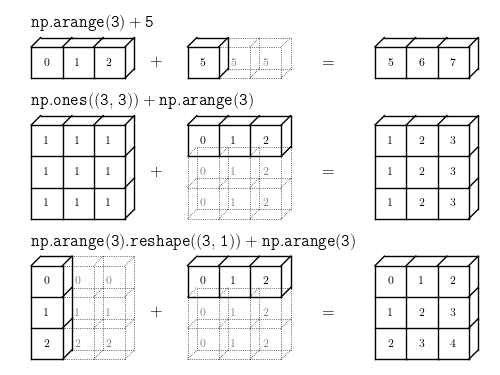

* The stretching analogy is only conceptual
* numpy is smart enough to use the original scalar value without actually making copies so that broadcasting operations are as memory and computationally efficient as possible.

In [ ]:
import numpy as np
np_ag=np.array([1,2,3,4,5])
np_ah=np.array([2,2,2,2,2])
int_a=2
np_ai=np_ag*np_ah
#with help of broadcasting
#the scalar value 'int_a' is streached to the shape of 'np_ag'
np_aj=np_ag*int_a

__________________________________________________________________________________________________________________________________________________
__The Broadcasting Rule__
* In order to broadcast, the size of the trailing axes for both arrays in an operation must either be the same size or one of them must be one.
__________________________________________________________________________________________________________________________________________________

In [ ]:
from numpy import array, newaxis
np_ak = array([0.0, 10.0, 20.0, 30.0])
np_al = array([1.0, 2.0, 3.0])
np_ak[:,newaxis] + np_al

In [63]:
import numpy as np
x = np.array([[0], [1], [2]])
y = np.array([0, 1, 2])
b = np.broadcast(x, y)

In [64]:
out = np.empty(b.shape)
out.flat = [u+v for (u,v) in b]
out

array([[0., 1., 2.],
       [1., 2., 3.],
       [2., 3., 4.]])

In [65]:
x+y

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

In [66]:
b.reset()
l=[i for i in b]

In [67]:
l

[(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]